<a href="https://colab.research.google.com/github/ZahibVentura/Estad-stica/blob/main/Examen_Econometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_excel("SeriesB.xlsx") #Cargar nuestra base a python

In [3]:
xx = df['serie1']
yy = df['serie2']

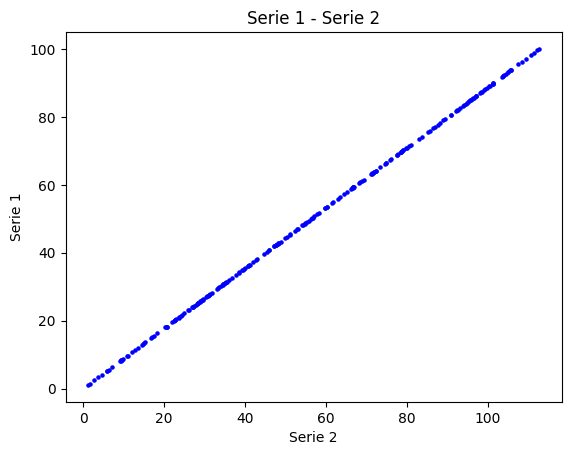

In [4]:
#Graficamos nuestro grafico de dispersión
plt.scatter(yy,xx,s = 5, c = 'b')
plt.title('Serie 1 - Serie 2')
plt.xlabel('Serie 2')
plt.ylabel('Serie 1')
plt.show()

In [5]:
#Transofrmando nuestros datos, proponemos elevar al cuadrado los datos
#df['(serie1)^2'] = (df['serie1'])**(2)

# Añadir una constante (B0)
X = sm.add_constant(df['serie2'])  # Agrega columna de 1's para el intercepto
y = df['serie1']

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()  # Regresión lineal ordinaria

# Obtener B0 y B1
B0 = modelo.params[0]  # Intercepto
B1 = modelo.params[1]  # Pendiente



<ipython-input-5-adabe97a9053>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  B0 = modelo.params[0]  # Intercepto
<ipython-input-5-adabe97a9053>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  B1 = modelo.params[1]  # Pendiente


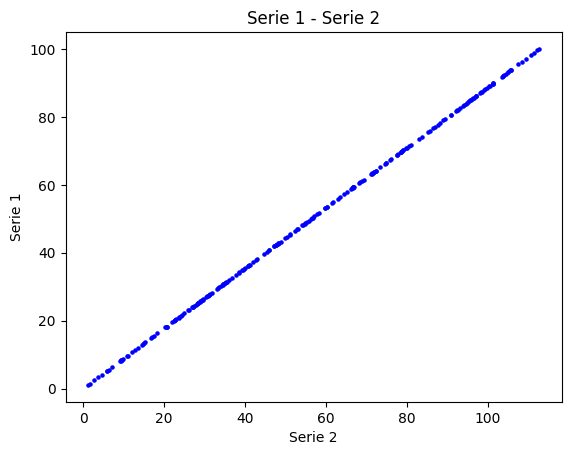

In [7]:
plt.scatter(df['serie2'],df['serie1'],s = 5, c = 'b')
plt.title('Serie 1 - Serie 2')
plt.xlabel('Serie 2')
plt.ylabel('Serie 1')
plt.show()

In [8]:
#Vemos los valores de B0 y B1
print(f"B0 (Intercepto): {B0:.4f}")
print(f"B1 (Pendiente): {B1:.4f}")

B0 (Intercepto): -0.0000
B1 (Pendiente): 0.8869


In [9]:
#La ecuación de regresión
a = np.linspace(df['serie2'].min(),df['serie2'].max(),1000)
b = B0 + B1*a

In [10]:
#Calculos de los residuos
df['(yi-y_media)^2'] = (df['serie1']-df['serie1'].mean())**2
df['y_estimada'] = B0 + B1*df['serie2']
df['(y_estimada-y_media)^2'] = (df['y_estimada']-df['serie1'].mean())**2
df['u'] = df['serie1']-df['y_estimada']
df['u^2'] = df['u']**2
print(df)

     Unnamed: 0     serie1      serie2  (yi-y_media)^2  y_estimada  \
0           NaN  85.532282   96.437379     1251.232169   85.532282   
1           NaN  18.287428   20.619018     1015.830342   18.287428   
2           NaN  12.958279   14.610419     1383.932460   12.958279   
3           NaN  25.126103   28.329602      626.672063   25.126103   
4           NaN  26.278100   29.628475      570.322296   26.278100   
..          ...        ...         ...             ...         ...   
228         NaN  59.450784   67.030572       86.327565   59.450784   
229         NaN  99.597647  112.296034     2444.128286   99.597647   
230         NaN  83.896151   94.592647     1138.160195   83.896151   
231         NaN  42.895428   48.364460       52.767056   42.895428   
232         NaN  16.284646   18.360888     1147.507163   16.284646   

     (y_estimada-y_media)^2             u           u^2  
0               1251.232169 -2.842171e-14  8.077936e-28  
1               1015.830342  7.105427e-15  

In [11]:
#Calculo de la R^2 del modo R^2 = SCE / SCTy
R_2 = df['(y_estimada-y_media)^2'].sum() / df['(yi-y_media)^2'].sum()
print(R_2)

1.0000000000000009


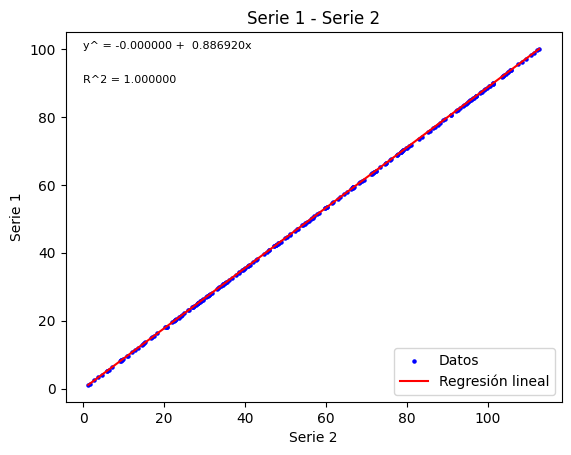

In [13]:
#Graficando la regresión junto a los datos de dispresión
plt.scatter(df['serie2'],df['serie1'],s = 5, c = 'b')
plt.plot(a,b,color = 'r')
plt.title('Serie 1 - Serie 2')
plt.xlabel('Serie 2')
plt.ylabel('Serie 1')
plt.text(0,100,f'y^ = {B0:.6f} +  {B1:.6f}x', fontsize=8, color='k')
plt.text(0,90,f'R^2 = {R_2:.6f}', fontsize=8, color='k')
plt.legend(['Datos','Regresión lineal'])
plt.show()